In [2]:
from netCDF4 import Dataset as ncfile
from netCDF4 import num2date
import matplotlib.dates as dates
import time
import numpy as np
import matplotlib.pyplot as plt
from pylab import colorbar
import sys
import numpy.ma as ma
import cartopy
import pandas as pd
import datetime
import matplotlib
import itertools
from datetime import datetime, timedelta

In [3]:
ppidir = '/lustre/storeB/users/justinec/master_internship/data/ERA5_MOSAiC/'
data_link  = ppidir + 'concatenated_ERA5_MOSAiC.nc'

dataset = ncfile(data_link,'r')    #dataset of radiosoundings of MOSAiC and ERA5

In [4]:
pres = dataset.variables['pres'][:]
era5_rh = dataset.variables['rh_era5'][:]
mosaic_rh = dataset.variables['rh_mosaic'][:]
era5_temp = dataset.variables['temp_era5'][:]
mosaic_temp = dataset.variables['temp_mosaic'][:]
era5_sh = dataset.variables['sh_era5'][:]
mosaic_sh = dataset.variables['sh_mosaic'][:]
mosaic_time = dataset.variables['time_mosaic'][:]
mosaic_lat = dataset.variables['lat_mosaic'][:]
mosaic_lon = dataset.variables['lon_mosaic'][:]

In [5]:
"""Function that convert times of a dataset depemding on its unit and calendar 
type to a datetime then to Matplotlib dates.
---exemple---
ERA5 :  'hours since 1900-01-01 00:00:00.0' become datetime of type 2019-10-01 00:00:00 then 18170
MOSAiC : 'seconds since 2019-10-31T22:55:09.757Z' become datetime of type 2019-10-31 22:55:09.757000 then 18200.954974039352
"""
def convert_time(dataset) :
    dataset_time = dataset.variables['time_mosaic']
    t_unit = dataset_time.units
    t_cal = dataset_time.calendar
    dataset_nctime=[]; 
    dataset_nctime.append(num2date(dataset_time,units = t_unit,calendar = t_cal, only_use_python_datetimes=True, only_use_cftime_datetimes=False)) #datetime of type 2019-10-01 00:00:00
    #dates.date2num --> convert datetime objects to Matplotlib dates (better for compare ERA5 and MOSAiC times and for figures)
    #np.squeeze --> pass Matplotlib dates in column instead of in line
    dataset_nctimenum = np.squeeze(dates.date2num(dataset_nctime))
    return dataset_nctime,dataset_nctimenum,t_unit

In [6]:
nctime, nctimenum, t_unit = convert_time(dataset)

In [7]:
from datetime import datetime

In [8]:
new_datetime = []
for i in range(0,len(nctime[0])) :
    time = nctime[0][i][0]
    new_datetime.append(datetime(time.year, time.month, time.day))

In [61]:
def daily_mean(data) :
    datetimes = new_datetime
    temp_array = np.array(data)
    datetime_array = np.array(datetimes)
    start_date = datetime_array[0].date()
    unique_dates = np.unique(np.array([date.date() for date in datetime_array]))
    daily_averages = []
    for date in unique_dates:
        filtered_temps = temp_array[np.array([dt.date() for dt in datetime_array]) == date]
        average_temp = np.mean(filtered_temps, axis=0)
        daily_averages.append(average_temp)
    return unique_dates, daily_averages

In [85]:
uniques_dates, mosaic_temp_dm = daily_mean(mosaic_temp)
uniques_dates, era5_temp_dm = daily_mean(era5_temp)
uniques_dates, mosaic_rh_dm = daily_mean(mosaic_rh)
uniques_dates, era5_rh_dm = daily_mean(era5_rh)
uniques_dates, mosaic_sh_dm = daily_mean(mosaic_sh)
uniques_dates, era5_sh_dm = daily_mean(era5_sh)

In [69]:
mosaic = mosaic_temp_dm[184:214]
era5 = era5_temp_dm[184:214]
time = uniques_dates[184:214]

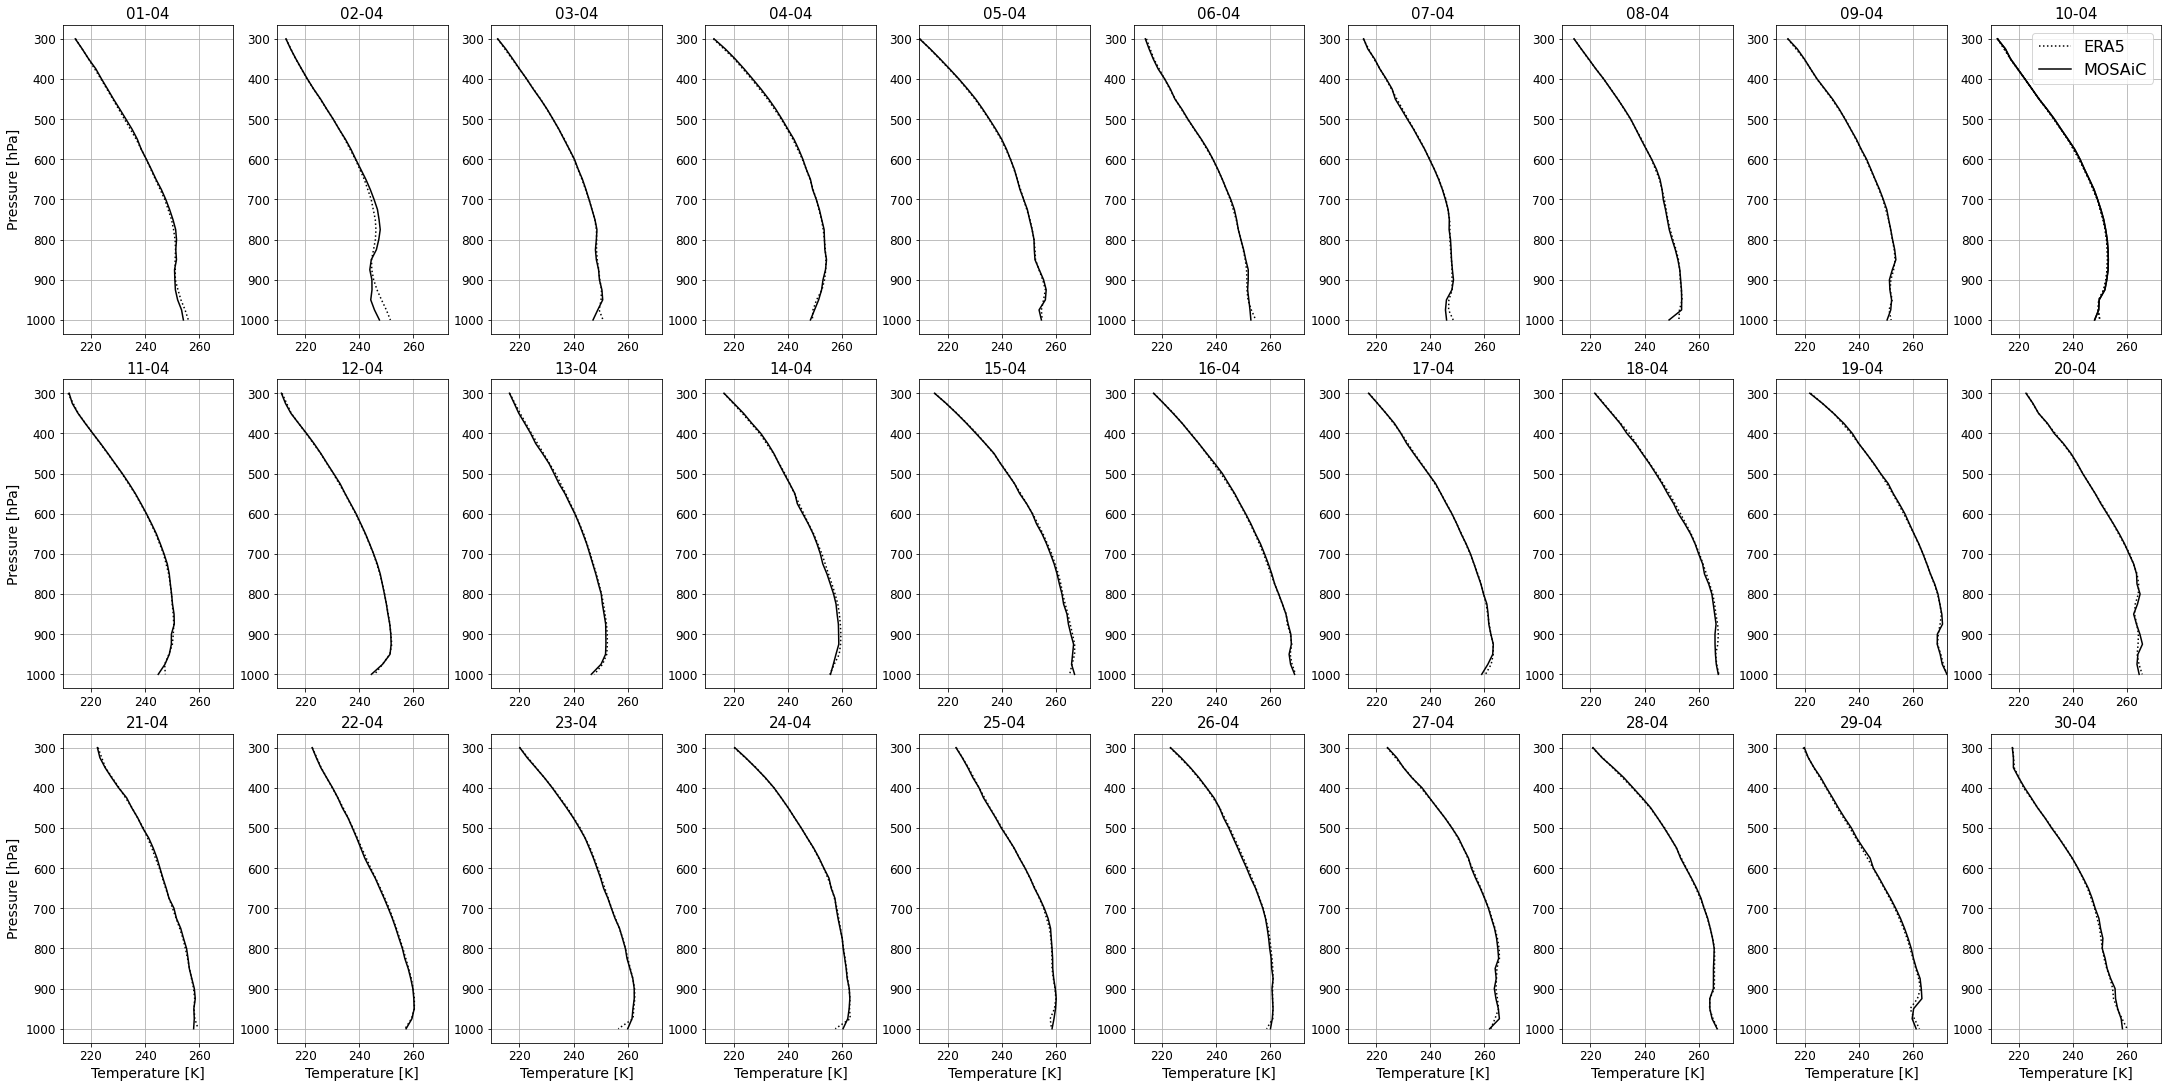

In [86]:
parameters = {'axes.labelsize':14, 'axes.titlesize':15, 'legend.fontsize':16, 'xtick.labelsize':12, 'ytick.labelsize':12, 
                  'legend.title_fontsize':14, 'figure.titlesize':25}
plt.rcParams.update(parameters)

nrows=3 ; ncols=10
fig, axs = plt.subplots(nrows,ncols,figsize=(30,15), constrained_layout=True)  
n=0
for i in range(nrows) :
    for j in range(ncols) :
        axs[i,j].plot(era5[n], pres, ':', color='k')
        axs[i,j].plot(mosaic[n], pres, color='k')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(time[n].strftime("%d-%m"))
        axs[i,j].set_xlim(np.nanmin(mosaic),np.nanmax(mosaic))
        axs[i,j].grid()
        if j == 0 :
            axs[i,j].set_ylabel('Pressure [hPa]')
        if i == 2 :
            axs[i,j].set_xlabel('Temperature [K]')
        if i == 0 and j == 9 :
            axs[i,j].plot(era5[n], pres, ':', color='k', label='ERA5')
            axs[i,j].plot(mosaic[n], pres, color='k', label='MOSAiC')
            axs[i,j].legend()
        n=n+1

path_fig = '/lustre/storeB/users/justinec/master_internship/figures/'
plt.savefig(path_fig+'april_temp.png',dpi=300, facecolor='white', transparent=False)

In [87]:
mosaic = mosaic_rh_dm[184:214]
era5 = era5_rh_dm[184:214]
time = uniques_dates[184:214]

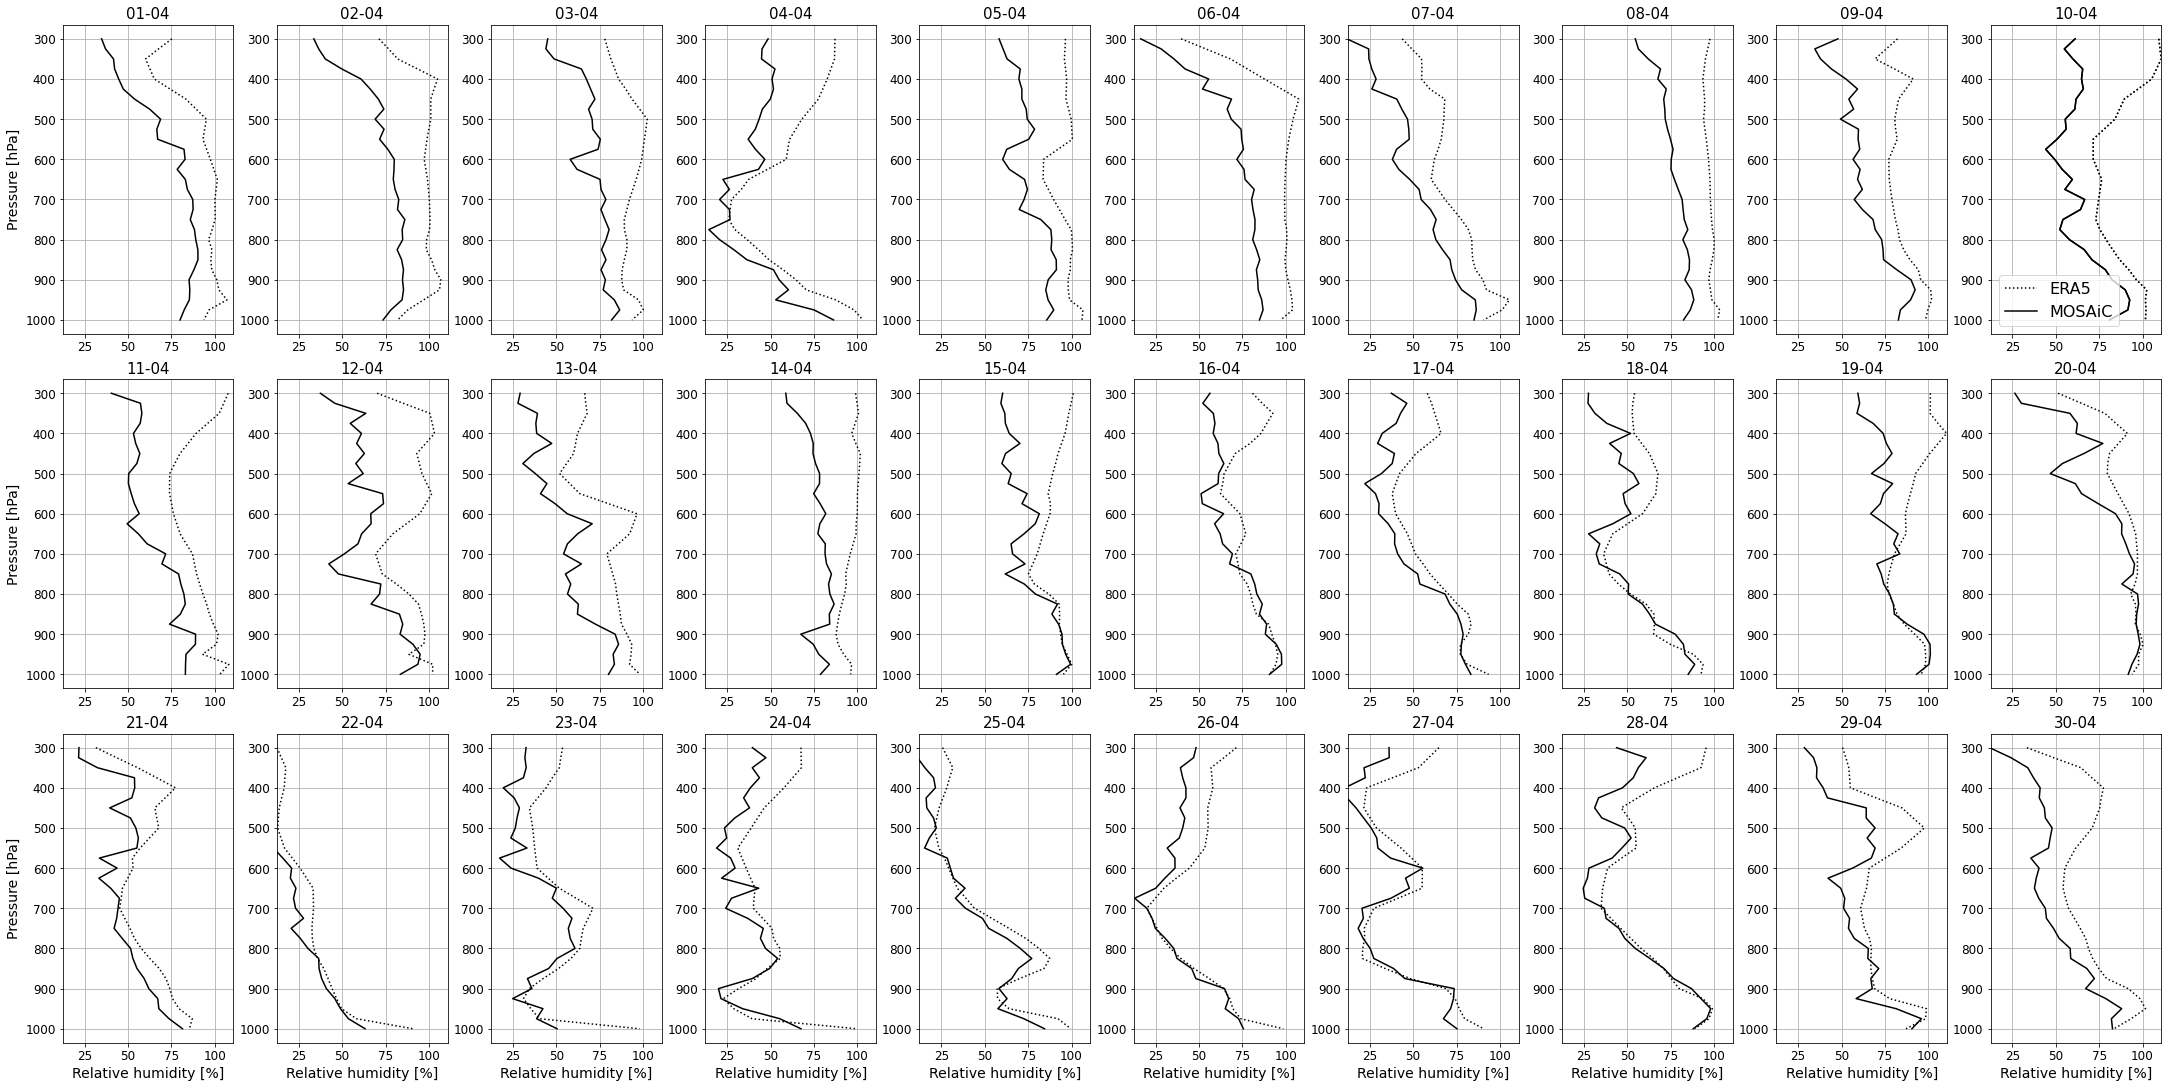

In [90]:
parameters = {'axes.labelsize':14, 'axes.titlesize':15, 'legend.fontsize':16, 'xtick.labelsize':12, 'ytick.labelsize':12, 
                  'legend.title_fontsize':14, 'figure.titlesize':25}
plt.rcParams.update(parameters)

nrows=3 ; ncols=10
fig, axs = plt.subplots(nrows,ncols,figsize=(30,15), constrained_layout=True)  
n=0
for i in range(nrows) :
    for j in range(ncols) :
        axs[i,j].plot(era5[n], pres, ':', color='k')
        axs[i,j].plot(mosaic[n], pres, color='k')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(time[n].strftime("%d-%m"))
        axs[i,j].set_xlim(np.nanmin(era5),np.nanmax(era5))
        axs[i,j].grid()
        if j == 0 :
            axs[i,j].set_ylabel('Pressure [hPa]')
        if i == 2 :
            axs[i,j].set_xlabel('Relative humidity [%]')
        if i == 0 and j == 9 :
            axs[i,j].plot(era5[n], pres, ':', color='k', label='ERA5')
            axs[i,j].plot(mosaic[n], pres, color='k', label='MOSAiC')
            axs[i,j].legend()
        n=n+1

path_fig = '/lustre/storeB/users/justinec/master_internship/figures/'
plt.savefig(path_fig+'april_rh.png',dpi=300, facecolor='white', transparent=False)

In [91]:
mosaic = mosaic_sh_dm[184:214]
era5 = era5_sh_dm[184:214]
time = uniques_dates[184:214]

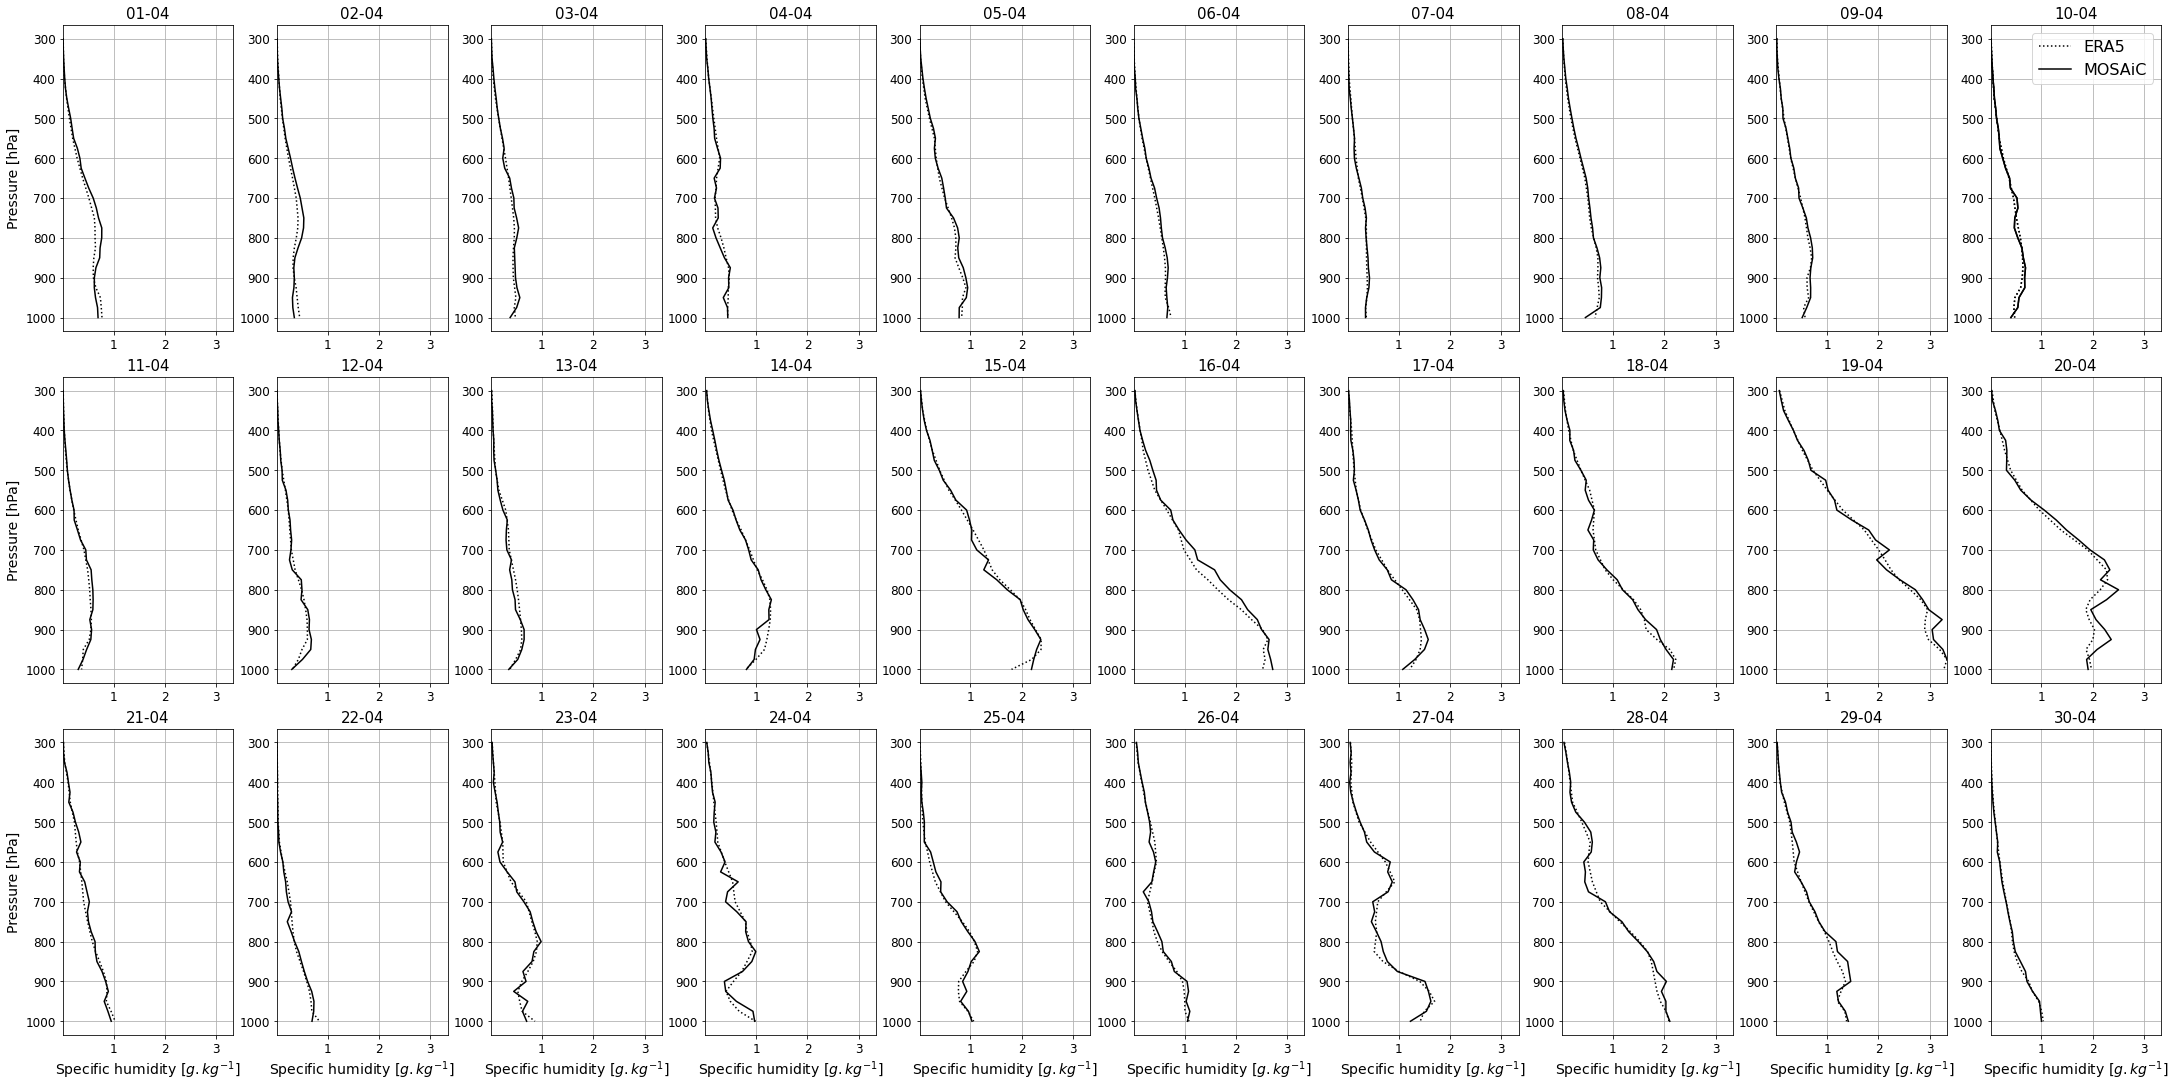

In [92]:
parameters = {'axes.labelsize':14, 'axes.titlesize':15, 'legend.fontsize':16, 'xtick.labelsize':12, 'ytick.labelsize':12, 
                  'legend.title_fontsize':14, 'figure.titlesize':25}
plt.rcParams.update(parameters)

nrows=3 ; ncols=10
fig, axs = plt.subplots(nrows,ncols,figsize=(30,15), constrained_layout=True)  
n=0
for i in range(nrows) :
    for j in range(ncols) :
        axs[i,j].plot(era5[n], pres, ':', color='k')
        axs[i,j].plot(mosaic[n], pres, color='k')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(time[n].strftime("%d-%m"))
        axs[i,j].set_xlim(np.nanmin(era5),np.nanmax(era5))
        axs[i,j].grid()
        if j == 0 :
            axs[i,j].set_ylabel('Pressure [hPa]')
        if i == 2 :
            axs[i,j].set_xlabel('Specific humidity [$g.kg^{-1}$]')
        if i == 0 and j == 9 :
            axs[i,j].plot(era5[n], pres, ':', color='k', label='ERA5')
            axs[i,j].plot(mosaic[n], pres, color='k', label='MOSAiC')
            axs[i,j].legend()
        n=n+1

path_fig = '/lustre/storeB/users/justinec/master_internship/figures/'
plt.savefig(path_fig+'april_sh.png',dpi=300, facecolor='white', transparent=False)